### Importing libraries

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
%matplotlib inline

### Loading the Train and Test Data Set provided from its respective CSV files

In [86]:
Xtr=np.loadtxt("TrainData.csv")    #x_train
Ytr=np.loadtxt("TrainLabels.csv")  #y_train
Xts=np.loadtxt("TestData.csv")     #x_test

# print(Xtr.shape)
# print(Ytr.shape)
# print(Xts.shape)
# type(Xtr)

### Displaying an image from the array after reshaping|

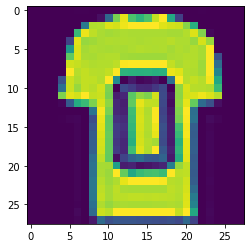

In [87]:
plt.imshow(Xtr[10].reshape([28,28]))

### Displaying an image from the Xtr array

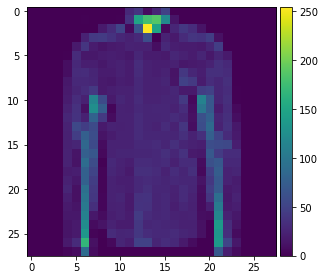

In [114]:
(imshow(Xtr[2650].reshape([28,28])))
# new_p = resize((imshow(Xtr[2650].reshape([28,28]))), (128,64)) 

new_p = Xtr[2650].reshape([28, 28])
# resized_img = resize(img, (128,64)) 
# new_p = resize((imshow(Xtr[2650].reshape([28,28]))), (128,64)) 

### Function to extract and save HOG features of an image

In [93]:
def extract_features(x,X_tr):
    for i in x:
        new_p = i.reshape([28, 28])
        
        fd = hog(new_p, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=False)
        
        X_tr.append(fd)

### Extracting its HOG features and copying them in the list X_tr (pass by ref) and converting it into a numpy array

In [94]:
X_tr = []

extract_features(Xtr, X_tr)

X_tr_A = np.array(X_tr)
# X_tr_A.shape

### Spliting the Data for Machine Learning (Train: 80%, Test:20%)

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_tr_A, Ytr, test_size=0.2, random_state=9,shuffle=True)

# print(x_train.shape)
# print(Xtr.shape)
# print(Ytr.shape)
# print(y_train.shape)
# type(x_train)
# x_test.shape
# x_train.shape

##                                                              Machine Learning

### Support vector classifier

In [96]:
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel='linear', gamma=0.001, C=1)
model.fit(x_train, y_train)

SVC(C=1, gamma=0.001, kernel='linear')

### Predicting the labels for the test data 

In [97]:
pred = model.predict(x_test)

### Calculating accuracy of SVC model i.e 77.292 %

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7729166666666667

In [106]:
pred_to_CSV=pred

### DecisionTrees

In [99]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Predicting the labels for the test data

In [100]:
pred = model.predict(x_test)

### Calculating accuracy of Decision Tree model i.e 74.083 %

In [101]:
accuracy_score(y_test, pred)

0.7408333333333333

### GaussianNB 

In [102]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

### Predicting the labels for the test data

In [103]:
pred = model.predict(x_test)

### Calculating accuracy of Gaussian model i.e 75.292 %

In [104]:
accuracy_score(y_test, pred)

0.7529166666666667

### Storing the predicted labels for SVC into a Data Frame and converting it into a CSV file

In [108]:
import pandas as pd

In [110]:
df = pd.DataFrame(pred_to_CSV)
df.to_csv('file.csv')

In [112]:
# df